In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
pip install reverse-geocode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
df_dostop = pd.read_csv('/kaggle/input/datasefqfgrgv/data-56-structure-9.csv')

/tmp/ipykernel_30/3448902671.py:1: DtypeWarning: Columns (1,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dostop = pd.read_csv('/kaggle/input/datasefqfgrgv/data-56-structure-9.csv')


In [ ]:
df_dostop.head()

In [14]:
df_dos = df_dostop[df_dostop['Категория историко-культурного значения']=='Федерального значения']
df_dos = df_dos[df_dos['Особо ценный объект'] == 'да']
df_dos.shape

(258, 55)

In [ ]:
df_dos.head()

In [215]:
df_test = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

In [216]:
df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv',nrows = 200000)

In [217]:
df = df[df['fare_amount'] > 0]
df = df[df['fare_amount'] < 25]
df = df[df['passenger_count'] < 7]
df = df[df['pickup_longitude'] > -180]
df = df[df['pickup_longitude'] < 180]
df = df[df['pickup_latitude'] > -90]
df = df[df['pickup_latitude'] < 90]
df = df.iloc[:100000]

In [218]:
df['dataset'] = 'train'
df_test['dataset'] = 'test'

# Объединяем датасеты
df = pd.concat([df, df_test], axis=0, ignore_index=True)

In [219]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
import reverse_geocode
from tqdm import tqdm
pickup_coords_list = df[['pickup_latitude', 'pickup_longitude']].values.tolist()


loc = []
for i in tqdm(range(df.shape[0])):
    loc.append(reverse_geocode.get(pickup_coords_list[i]))


100%|██████████| 109914/109914 [00:06<00:00, 17740.09it/s]


In [220]:
json_df = pd.DataFrame(loc)
df = pd.concat([df.reset_index(drop=True), json_df.reset_index(drop=True)], axis=1)


In [103]:
pip install h3

Note: you may need to restart the kernel to use updated packages.


In [221]:
h3_data_10 = []
h3_data_8 = []
for i in tqdm(range(df.shape[0])):
    h3_data_10.append(h3.latlng_to_cell(pickup_coords_list[i][0],pickup_coords_list[i][1],10))
for i in tqdm(range(df.shape[0])):
    h3_data_8.append(h3.latlng_to_cell(pickup_coords_list[i][0],pickup_coords_list[i][1],8))
    
df['h3_10'] = h3_data_10
df['h3_8'] = h3_data_8

100%|██████████| 109914/109914 [00:00<00:00, 306284.32it/s]


In [115]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,country_code,city,latitude,longitude,population,state,county,country,h3_10,h3_3
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,US,Forest Hills,40.71621,-73.85014,67714,New York,Queens County,United States,8a2a100c5adffff,832a10fffffffff
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,US,Battery Park City,40.71149,-74.01625,7422,New York,New York County,United States,8a2a10728d5ffff,832a10fffffffff
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,US,Times Square,40.75636,-73.98644,17749,New York,New York County,United States,8a2a100d6457fff,832a10fffffffff
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,US,East Village,40.72927,-73.98736,62832,New York,New York County,United States,8a2a100d221ffff,832a10fffffffff
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,US,Manhattan,40.78343,-73.96625,1487536,New York,New York County,United States,8a2a100d699ffff,832a10fffffffff


In [222]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Создадим примерные данные

# Инициализируем PCA для двух компонент (так как у нас широта и долгота)
pca = PCA(n_components=2)

# Применим PCA к координатам точек отправления
pickup_coords = df[['pickup_latitude', 'pickup_longitude']]
pca_pickup = pca.fit_transform(pickup_coords)

# Применим PCA к координатам точек назначения
dropoff_coords = df[['dropoff_latitude', 'dropoff_longitude']]
pca_dropoff = pca.fit_transform(dropoff_coords)

# Добавим новые PCA-признаки в DataFrame
df['pickup_pca0'] = pca_pickup[:, 0]
df['pickup_pca1'] = pca_pickup[:, 1]
df['dropoff_pca0'] = pca_dropoff[:, 0]
df['dropoff_pca1'] = pca_dropoff[:, 1]

# Выведем результат
# print(train[['pickup_latitude', 'pickup_longitude', 'pickup_pca0', 'pickup_pca1',
#              'dropoff_latitude', 'dropoff_longitude', 'dropoff_pca0', 'dropoff_pca1']].head())

In [5]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [223]:
import pandas as pd
from geopy.distance import geodesic
reference_points = {
    '1': (40.689255, -74.044590),   
    '2': (43.082714, -79.064418),
    '3': (40.748419, -73.985561), 
    '4': (40.757570, -73.985797), 
    '5': (40.705657, -73.996438),   
    '6': (40.782409, -73.965556),   
    '7': (40.783377, -73.959017),   
    '8': (40.782876, -73.959016),   
    '9': (40.752681, -73.977293),   
    '10': (34.101562, -118.327065)
}

# Функция для расчета расстояния Хаверсина
def haversine_(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # радиус Земли в км
    lat_diff = lat2 - lat1
    lng_diff = lng2 - lng1
    d = np.sin(lat_diff * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_diff * 0.5) ** 2
    return 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))

# Функция для вычисления направления между координатами
def bearing_array(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return (np.degrees(np.arctan2(y, x)) + 360) % 360

# Добавляем расчет расстояний и направлений до каждой опорной точки
for point_name, (ref_lat, ref_lon) in reference_points.items():
    # Расчет расстояния Хаверсина
    df[f'distance_to_{point_name}'] = haversine_(
        df['pickup_latitude'], df['pickup_longitude'], ref_lat, ref_lon
    )
    
    # Расчет направления (азимута) от pickup к опорной точке
    df[f'direction_to_{point_name}'] = bearing_array(
        df['pickup_latitude'], df['pickup_longitude'], ref_lat, ref_lon
    )


In [224]:
def haversine_vectorized(lat1, lng1, lat2, lng2):
    """Векторизованный расчет расстояния Хаверсина между координатами в километрах"""
    AVG_EARTH_RADIUS = 6371  # радиус Земли в км
    lat1, lng1, lat2, lng2 = map(np.radians, [lat1, lng1, lat2, lng2])
    lat_diff = lat2 - lat1
    lng_diff = lng2 - lng1
    d = np.sin(lat_diff * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_diff * 0.5) ** 2
    return 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))

# Применяем векторизованную функцию для расчета расстояния
df['distance_km'] = haversine_vectorized(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)

In [225]:
df['timestamp'] = pd.to_datetime(df['pickup_datetime'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

# Бинарные признаки
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Суббота и воскресенье
df['is_holiday'] = df['timestamp'].dt.strftime('%m-%d').isin(['01-01', '07-04', '12-25']).astype(int)  # Пример праздников

# Циклические признаки
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / 60)
df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / 60)



df['is_winter'] = (df['month'] == 12) | (df['month'] < 3)
df['is_spring'] = (df['month'] >= 3) & (df['month'] < 6)
df['is_summer'] = (df['month'] >= 6) & (df['month'] < 9)
df['is_autumn'] = (df['month'] >= 9) & (df['month'] < 12)



In [226]:
from math import radians, degrees, atan2, cos, sin

def calculate_azimuth(lat1, lon1, lat2, lon2):
    # Преобразуем широту и долготу в радианы
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    d_lon = lon2 - lon1

    # Вычисляем азимут
    x = sin(d_lon) * cos(lat2)
    y = cos(lat1) * sin(lat2) - sin(lat1) * cos(lat2) * cos(d_lon)
    azimuth = atan2(x, y)
    
    # Преобразуем в градусы
    return (degrees(azimuth) + 360) % 360

# Пример данных с начальной и конечной точкам
# Применяем функцию для вычисления азимута
df['azimuth'] = df.apply(lambda row: calculate_azimuth(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [227]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['city', 'state', 'county','country','h3_10','h3_8']

# Создаем копию DataFrame, чтобы не изменять исходный
train_encoded = df.copy()
label_encoders = {}

for column in columns_to_encode:
    unique_values = train_encoded[column].nunique()
    
    # Если уникальных значений больше 10, применяем Label Encoding
    if unique_values > 10:
        label_encoder = LabelEncoder()
        train_encoded[column] = label_encoder.fit_transform(train_encoded[column])
        label_encoders[column] = label_encoder  # Сохраняем энкодер для этой колонки
    # Если уникальных значений 10 или меньше, применяем One-Hot Encoding
    else:
        train_encoded = pd.get_dummies(train_encoded, columns=[column])

In [231]:
df = train_encoded.copy()

In [232]:
train = df[df['dataset'] == 'train'].drop('dataset', axis=1)
test = df[df['dataset'] == 'test'].drop('dataset', axis=1)

In [ ]:
test_encoded = df.copy()

for column in columns_to_encode:
    if column in label_encoders:
        # Применяем сохраненный LabelEncoder
        test_encoded[column] = label_encoders[column].transform(test_encoded[column])
    else:
        # Применяем One-Hot Encoding для колонок с малым количеством уникальных значений
        test_encoded = pd.get_dummies(test_encoded, columns=[column])

print("\nEncoded Test DataFrame:")
print(test_encoded)

In [ ]:
pip install catboost

In [128]:

train_encoded.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,country_code,city,latitude,longitude,population,state,county,h3_10,h3_3,distance_to_1,direction_to_1,distance_to_2,direction_to_2,distance_to_3,direction_to_3,distance_to_4,direction_to_4,distance_to_5,direction_to_5,distance_to_6,direction_to_6,distance_to_7,direction_to_7,distance_to_8,direction_to_8,distance_to_9,direction_to_9,distance_to_10,direction_to_10,distance_km,timestamp,year,month,day,day_of_week,hour,minute,is_weekend,is_holiday,hour_sin,hour_cos,month_sin,month_cos,minute_sin,minute_cos,is_winter,is_spring,is_summer,is_autumn,azimuth,country_Canada,country_Colombia,country_French Southern Territories,country_Ghana,country_Spain,country_United States
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,US,59,40.71621,-73.85014,67714,7,24,1108,1,17.254688,258.140328,505.411203,303.015292,12.276803,284.254706,12.583399,288.729458,12.939545,262.314701,12.265819,303.668148,11.873302,305.571059,11.840973,305.351830,11.734407,287.332016,3954.052947,273.895485,1.029601,2009-06-15 17:26:21+00:00,2009,6,15,0,17,26,0,0,-0.965926,-0.258819,1.224647e-16,-1.000000e+00,4.067366e-01,-0.913545,False,False,True,False,167.240469,False,False,False,False,False,True
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,US,4,40.71149,-74.01625,7422,7,16,3509,1,3.435082,224.472360,493.950991,303.922993,4.861317,31.890279,5.741444,26.345725,1.768136,110.791146,8.978147,28.262371,9.343984,30.922940,9.296300,31.100018,5.642068,35.351982,3939.686486,273.809735,8.443441,2010-01-05 16:52:16+00:00,2010,1,5,1,16,52,0,0,-0.866025,-0.500000,5.000000e-01,8.660254e-01,-7.431448e-01,0.669131,True,False,False,False,21.498365,False,False,False,False,False,True
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,US,170,40.75636,-73.98644,17749,7,16,2144,1,9.554590,213.080158,493.216514,303.228642,1.448615,189.448567,0.485437,212.057165,6.290701,190.578121,2.760177,31.608950,3.167457,39.089591,3.124479,39.735152,1.059464,154.347520,3942.120179,273.759082,1.389132,2011-08-18 00:35:00+00:00,2011,8,18,3,0,35,0,0,0.000000,1.000000,-8.660254e-01,-5.000000e-01,-5.000000e-01,-0.866025,False,False,True,False,211.033211,False,False,False,False,False,True
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,US,42,40.72927,-73.98736,62832,7,16,1408,1,6.875409,224.800599,494.628826,303.551662,1.703749,4.449300,2.718479,2.367041,3.155367,194.398056,5.771641,18.343917,6.066926,22.963478,6.015712,23.171380,2.325224,20.876631,3941.957049,273.795940,2.795790,2012-04-21 04:30:42+00:00,2012,4,21,5,4,30,1,0,0.866025,0.500000,8.660254e-01,-5.000000e-01,5.665539e-16,-1.000000,False,True,False,False,352.327836,False,False,False,False,False,True
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,US,108,40.78343,-73.96625,1487536,7,16,2278,1,10.873469,216.381024,493.839129,303.087381,2.628441,214.039960,1.889404,232.105022,7.332850,199.014790,1.615528,7.603957,1.872125,24.095890,1.821450,24.813927,1.872095,204.447517,3943.301628,273.758182,1.998338,2010-03-09 07:51:00+00:00,2010,3,9,1,7,51,0,0,0.965926,-0.258819,1.000000e+00,6.123234e-17,-8.090170e-01,0.587785,False,True,False,False,28.802783,False,False,False,False,False,True


In [248]:
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

col_to_drop = ['pickup_datetime','timestamp','key','country_code','fare_amount']
categorial_features = ['passenger_count','year','month','day','day_of_week','hour','minute','city', 'state', 'county','h3_10','h3_8']

for i in categorial_features:
    test[i] = test[i].astype('category')
    
    
    

In [247]:
test.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,country_code,city,latitude,longitude,population,state,county,h3_10,h3_8,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1,distance_to_1,direction_to_1,distance_to_2,direction_to_2,distance_to_3,direction_to_3,distance_to_4,direction_to_4,distance_to_5,direction_to_5,distance_to_6,direction_to_6,distance_to_7,direction_to_7,distance_to_8,direction_to_8,distance_to_9,direction_to_9,distance_to_10,direction_to_10,distance_km,timestamp,year,month,day,day_of_week,hour,minute,is_weekend,is_holiday,hour_sin,hour_cos,month_sin,month_cos,minute_sin,minute_cos,is_winter,is_spring,is_summer,is_autumn,azimuth,country_Canada,country_Colombia,country_French Southern Territories,country_Ghana,country_Spain,country_United States
100000,2015-01-27 13:08:24.0000002,NaN,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,US,178,40.75636,-73.98644,17749,7,16,2146,226,-1.534198,0.002343,-1.532817,0.025275,10.236527,215.946054,493.725946,303.157136,1.997552,211.078957,1.258981,236.587774,6.752833,196.772653,2.169484,17.536674,2.487318,28.957003,2.438769,29.592594,1.281440,195.138912,3942.893181,273.761022,2.323260,2015-01-27 13:08:24+00:00,2015,1,27,1,13,8,0,0,-0.258819,-0.965926,5.000000e-01,0.866025,0.743145,0.669131,True,False,False,False,197.102591,False,False,False,False,False,True
100001,2015-01-27 13:08:24.0000003,NaN,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,US,29,40.71649,-73.99625,90000,7,16,4024,475,-1.523688,0.047579,-1.545622,0.038012,5.907869,235.473469,495.494864,303.697544,3.230490,1.944424,4.247122,1.210430,1.726546,207.872865,7.234309,14.357507,7.492395,18.234549,7.439536,18.369545,3.789309,12.281624,3942.081118,273.815379,2.425353,2015-01-27 13:08:24+00:00,2015,1,27,1,13,8,0,0,-0.258819,-0.965926,5.000000e-01,0.866025,0.743145,0.669131,True,False,False,False,335.311613,False,False,False,False,False,True
100002,2011-10-08 11:53:44.0000002,NaN,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,US,178,40.75636,-73.98644,17749,7,16,1658,229,-1.535887,0.017810,-1.532429,0.022393,8.654213,217.205998,493.842388,303.335445,0.406503,219.002623,0.753859,338.550052,5.204603,193.023494,3.746809,22.413980,4.083238,28.993277,4.034650,29.377970,0.468106,70.270792,3942.211276,273.773234,0.618628,2011-10-08 11:53:44+00:00,2011,10,8,5,11,53,1,0,0.258819,-0.965926,-8.660254e-01,0.500000,-0.669131,0.743145,False,False,False,True,156.994148,False,False,False,False,False,True
100003,2012-12-01 21:12:12.0000002,NaN,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,US,85,40.76496,-73.99090,45884,7,16,2417,232,-1.542988,0.002802,-1.544526,0.023025,10.240162,211.484164,492.929827,303.150692,2.187483,189.757663,1.203432,198.937826,7.029626,190.556284,2.088719,38.976209,2.544399,47.114908,2.506893,48.049404,1.713179,169.039419,3942.205188,273.750842,1.961033,2012-12-01 21:12:12+00:00,2012,12,1,5,21,12,1,0,-0.707107,0.707107,-2.449294e-16,1.000000,0.951057,0.309017,True,False,False,False,203.513308,False,False,False,False,False,True
100004,2012-12-01 21:12:12.0000003,NaN,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,US,113,40.78343,-73.96625,1487536,7,16,108,55,-1.540898,-0.023781,-1.539293,0.028328,12.989306,210.652742,492.666888,302.842423,4.883415,199.672033,3.948413,204.918560,9.697559,195.317921,0.820100,177.116445,0.925380,140.243291,0.968916,142.346513,4.232007,192.935887,3943.315760,273.728885,5.387301,2012-12-01 21:12:12+00:00,2012,12,1,5,21,12,1,0,-0.707107,0.707107,-2.449294e-16,1.000000,0.951057,0.309017,True,False,False,False,200.618451,False,False,False,False,False,True


In [249]:
X = test.drop(col_to_drop,axis = 1)

for i in categorial_features:
    X[i] = X[i].astype('category')
    
predict = model.predict(X)


In [250]:
sample = pd.DataFrame(predict,columns=['fare_amount'])

In [251]:
sample['key'] = df['key']
# sample = sample.rename({'0':'fare_amount'})
sample.head()


,fare_amount,key
0,11.171648,2009-06-15 17:26:21.0000001
1,10.897965,2010-01-05 16:52:16.0000002
2,6.844462,2011-08-18 00:35:00.00000049
3,9.719507,2012-04-21 04:30:42.0000001
4,16.097861,2010-03-09 07:51:00.000000135


In [256]:
sample.reset_index(drop=True, inplace=True)
sample.to_csv('solution2.csv', index=False)

AttributeError: 'Index' object has no attribute '_format_native_types'

In [154]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [153]:

X = df.drop(col_to_drop,axis = 1)
for i in categorial_features:
    X[i] = X[i].astype('category')

y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=323)
# Создаем Pool для тренировочного и тестового наборов
train_pool = Pool(data=X_train, label=y_train, cat_features=categorial_features)
eval_pool = Pool(data=X_test, label=y_test, cat_features=categorial_features)


# Обучение модели с использованием Pool
model = CatBoostRegressor(iterations=2500, random_seed = 23634, learning_rate=0.05, depth=8,task_type="GPU")
model.fit(train_pool, eval_set=eval_pool, verbose_eval=100, early_stopping_rounds=25,use_best_model=True)


# Рассчитываем RMSE на валидационном наборе
y_pred_val = model.predict(X_test)
rmse_val = sqrt(mean_squared_error(y_test, y_pred_val))
print(f"RMSE на валидационном наборе: {rmse_val}")

# Если требуется финальный тест на другой тестовой выборке:
y_pred_test = model.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Финальный RMSE: {rmse_test}")

0:	learn: 4.3417540	test: 4.4011751	best: 4.4011751 (0)	total: 42ms	remaining: 1m 45s
100:	learn: 2.1229677	test: 2.1803650	best: 2.1803650 (100)	total: 3.16s	remaining: 1m 15s
200:	learn: 2.0292967	test: 2.1115308	best: 2.1115308 (200)	total: 6.16s	remaining: 1m 10s
300:	learn: 1.9792853	test: 2.0828483	best: 2.0828483 (300)	total: 9.53s	remaining: 1m 9s
400:	learn: 1.9440852	test: 2.0661393	best: 2.0661393 (400)	total: 12.6s	remaining: 1m 5s
500:	learn: 1.9121890	test: 2.0539559	best: 2.0539559 (500)	total: 15.6s	remaining: 1m 2s
600:	learn: 1.8885412	test: 2.0479363	best: 2.0479269 (599)	total: 18.7s	remaining: 59.1s
700:	learn: 1.8654869	test: 2.0420808	best: 2.0420138 (699)	total: 21.8s	remaining: 55.9s
800:	learn: 1.8424192	test: 2.0373710	best: 2.0373710 (800)	total: 24.9s	remaining: 52.8s
900:	learn: 1.8211460	test: 2.0336147	best: 2.0333743 (890)	total: 28s	remaining: 49.7s
1000:	learn: 1.8019857	test: 2.0297784	best: 2.0297784 (1000)	total: 31.2s	remaining: 46.7s
1100:	learn:

In [157]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

# Разделение данных
X = df.drop(col_to_drop, axis=1)
for i in categorial_features:
    X[i] = X[i].astype('category')
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=323)
train_pool = Pool(data=X_train, label=y_train, cat_features=categorial_features)
eval_pool = Pool(data=X_test, label=y_test, cat_features=categorial_features)

# Определение функции для Optuna
def objective(trial):
    # Подбор гиперпараметров
    params = {
        'iterations': 2500,
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'random_seed': 23634,
        'task_type': 'GPU',  # Устанавливаем GPU, если доступен
        'early_stopping_rounds': 25,
        'use_best_model': True
    }
    
    # Обучение модели
    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=eval_pool, verbose=0)
    
    # Предсказание и расчет RMSE
    y_pred_val = model.predict(X_test)
    rmse_val = sqrt(mean_squared_error(y_test, y_pred_val))
    return rmse_val

# Запуск оптимизации
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# Наилучшие параметры и финальная модель
best_params = study.best_params
print("Наилучшие параметры:", best_params)

# Финальное обучение на лучших параметрах
final_model = CatBoostRegressor(**best_params, task_type="GPU", random_seed=23634)
final_model.fit(train_pool, eval_set=eval_pool, verbose=100)

# Оценка финальной модели
y_pred_test = final_model.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Финальный RMSE: {rmse_test}")

[I 2024-11-12 21:40:09,495] A new study created in memory with name: no-name-53d5cc7b-2b05-4884-8846-5a19b315d28d
/tmp/ipykernel_30/2306708891.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
[I 2024-11-12 21:41:04,093] Trial 0 finished with value: 2.1242886056753982 and parameters: {'learning_rate': 0.005009842328855711, 'depth': 6}. Best is trial 0 with value: 2.1242886056753982.
/tmp/ipykernel_30/2306708891.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
[I 2024-11-12 21:41:47,964] Trial 1 finished with value: 2.149619

Наилучшие параметры: {'learning_rate': 0.04307906094075237, 'depth': 10}
0:	learn: 4.3601800	test: 4.4198678	best: 4.4198678 (0)	total: 49.2ms	remaining: 49.2s
100:	learn: 2.0921296	test: 2.1680197	best: 2.1680197 (100)	total: 4.46s	remaining: 39.7s
200:	learn: 1.9693142	test: 2.0937414	best: 2.0937414 (200)	total: 8.99s	remaining: 35.7s
300:	learn: 1.9030990	test: 2.0718895	best: 2.0718895 (300)	total: 13.5s	remaining: 31.5s
400:	learn: 1.8518389	test: 2.0563873	best: 2.0563873 (400)	total: 18.1s	remaining: 27s
500:	learn: 1.8097072	test: 2.0484985	best: 2.0484985 (500)	total: 22.6s	remaining: 22.5s
600:	learn: 1.7689333	test: 2.0409169	best: 2.0409169 (600)	total: 27.2s	remaining: 18.1s
700:	learn: 1.7333743	test: 2.0340024	best: 2.0340024 (700)	total: 32.1s	remaining: 13.7s
800:	learn: 1.6978822	test: 2.0305149	best: 2.0303221 (798)	total: 36.8s	remaining: 9.13s
900:	learn: 1.6652241	test: 2.0261432	best: 2.0261432 (900)	total: 41.4s	remaining: 4.55s
999:	learn: 1.6357847	test: 2.02

In [102]:
df.set_index('key', inplace=True)

In [ ]:
2.171910113108149
2.1378275800804087
2.075830735335873
2.0623599694186456
2.0293888569854364

визуализация

In [ ]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

In [ ]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

https://www.kaggle.com/code/breemen/nyc-taxi-fare-data-exploration

In [78]:
# df.set_index('key', inplace=True)
window = 1
df['rolling_mean_3d'] = df['fare_amount'].rolling(window=window).mean()
df['rolling_sum_3d'] = df['fare_amount'].rolling(window=window).sum()
df['rolling_max_3d'] = df['fare_amount'].rolling(window=window).max()
df['rolling_min_3d'] = df['fare_amount'].rolling(window=window).min()



In [ ]:
df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv',nrows = 1000000)




array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'fare_amount'}>]], dtype=object)

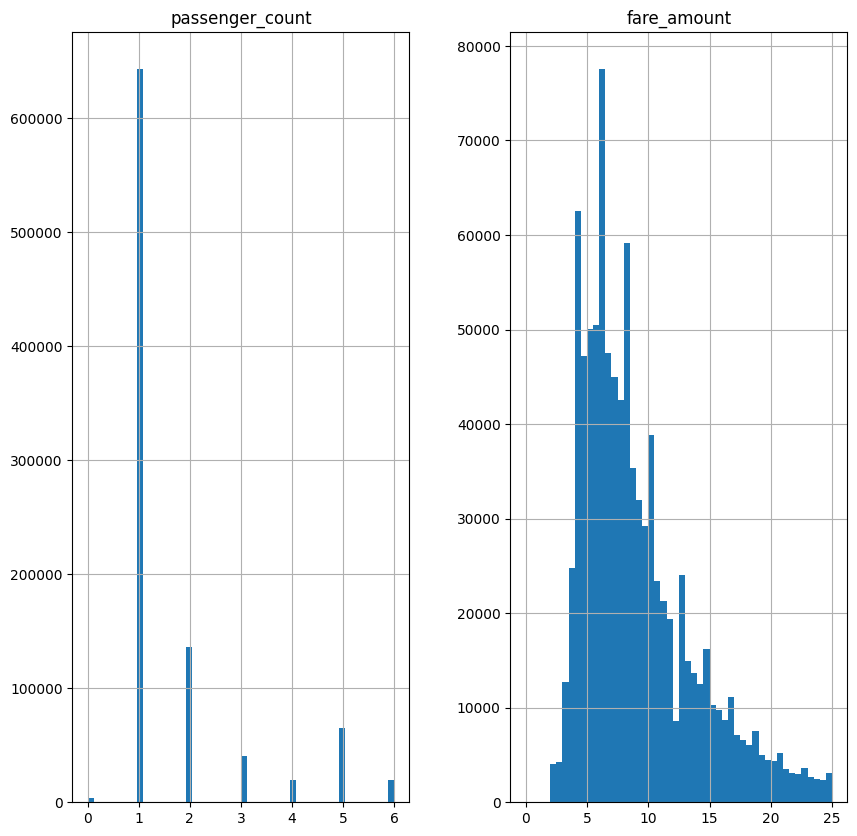

In [4]:
numerical_features = ['passenger_count','fare_amount']
df[numerical_features].hist(bins=50, figsize=(10, 10))

In [4]:
from sklearn.cluster import KMeans
import numpy as np
col = ['pickup_latitude','pickup_longitude']
X = np.array(df[col].values)

In [1]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.cluster import kmeans_plusplus

centers, indices = kmeans_plusplus(X, n_clusters=2, random_state=0)

NameError: name 'X' is not defined

In [ ]:
# def create_vector_features(lat, lon):
#     # Преобразуем широту и долготу в радианы
#     lat, lon = map(radians, [lat, lon])
#     return sin(lat), cos(lat), sin(lon), cos(lon)

# # Добавляем векторные признаки
# df['sin_lat'], df['cos_lat'], df['sin_lon'], df['cos_lon'] = zip(*df.apply(lambda row: create_vector_features(row['pickup_latitude'], row['pickup_longitude']), axis=1))


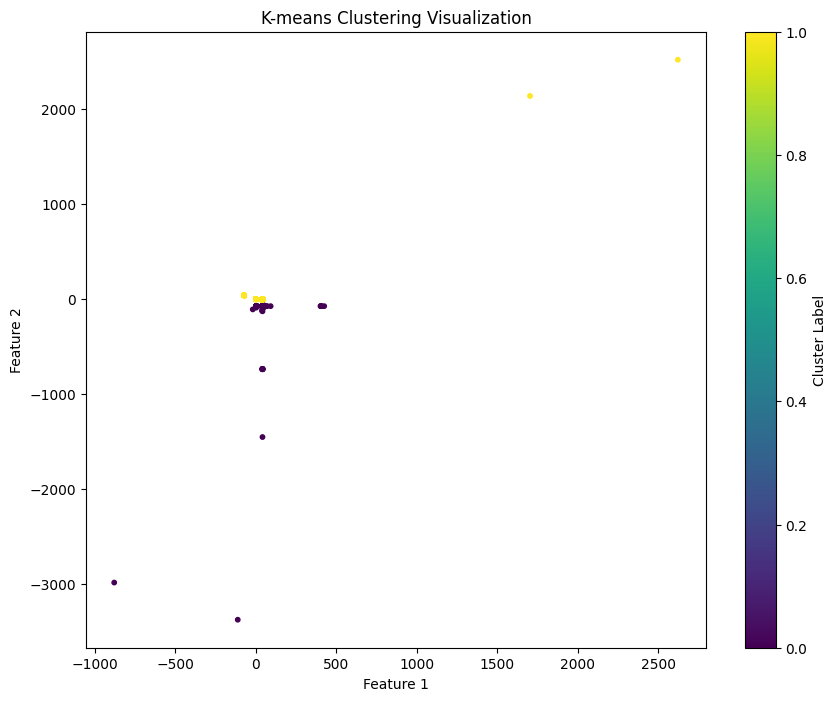

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.colorbar(label="Cluster Label")
plt.title("K-means Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
conda install -c rapidsai -c nvidia -c conda-forge cuml=23.06 python=3.10 cudatoolkit=11.8


Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - nodefaults
 - defaults
 - pytorch
Platform: linux-64
Solving environment: failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - package cuda-version-12.3-h55a0123_2 has constraint cudatoolkit 12.3|12.3.* conflicting with cudatoolkit-11.8.0-h37601d7_10

Could not solve for environment specs
The following packages are incompatible
├─ cuda-version 12.3**  is installable and it requires
│  └─ cudatoolkit 12.3|12.3.* , which can be installed;
└─ cudatoolkit 11.8**  is not installable because it conflicts with any installable versions previously reported.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cuml
import cudf
import numpy as np

from cuml.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Переносим данные на GPU
X_gpu = cudf.DataFrame.from_records(X)

# Настройка и выполнение DBSCAN на GPU
dbscan_gpu = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan_gpu.fit_predict(X_gpu)

# Переносим результаты обратно на CPU, если нужно
labels_cpu = labels.to_numpy()

In [ ]:
print(labels_cpu)

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

In [63]:
df[kmeans.labels_ == 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
4999995,2011-01-24 21:33:44.0000003,16.5,2011-01-24 21:33:44 UTC,-74.003883,40.725772,-73.969391,40.800830,1
4999996,2013-10-11 12:12:00.000000118,9.0,2013-10-11 12:12:00 UTC,-73.995105,40.739897,-73.985217,40.731950,2
4999997,2014-12-06 23:04:28.0000002,10.5,2014-12-06 23:04:28 UTC,-73.981063,40.764125,-73.979259,40.781857,2
4999998,2015-05-30 19:01:24.0000004,10.0,2015-05-30 19:01:24 UTC,-73.965401,40.759140,-73.971886,40.750870,1


In [65]:
df_cluster0 = df[kmeans.labels_ == 0]

<Figure size 1000x1000 with 0 Axes>

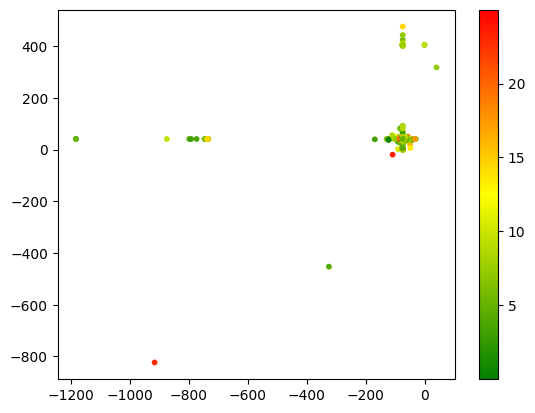

In [66]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))

cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])

f, ax = plt.subplots()
points = ax.scatter(df_cluster0['pickup_longitude'], df_cluster0['pickup_latitude'], c=df_cluster0['fare_amount'],
                    s=10, cmap=cmap)
f.colorbar(points)

z score

In [37]:
df['z_score'] = (df['value'] - df['value'].mean()) / df['value'].std()

# Убираем аномалии с Z-оценкой больше 3 или меньше -3
df_no_outliers = df[np.abs(df['z_score']) <= 3].copy()

# Удаляем вспомогательный столбец 'z_score'
df_no_outliers.drop(columns=['z_score'], inplace=True)

(4640489, 8)

https://openai01.net/ru

https://llmarena.ru/

In [ ]:
params = {
    'iterations': 2500,
    'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
    'depth': trial.suggest_int('depth', 4, 10),
    'random_seed': 23634,
    'task_type': 'GPU',
    'early_stopping_rounds': 25,
    'use_best_model': True,
    
    # Новый параметр: метод оценки листа
    'leaf_estimation_method': trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient']),
    
    # Новый параметр: регуляризация листа
    'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10.0),
    
    # Новый параметр: минимальное количество выборок в узле
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 20),
    
    # Новый параметр: количество бинов для дискретизации числовых признаков
    'border_count': trial.suggest_int('border_count', 32, 254),
    
    # Новый параметр: настройка глубины дерева на каждой итерации
    'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
    
    # Новый параметр: контроль подвыборки признаков
    'random_strength': trial.suggest_uniform('random_strength', 0, 1),
    
    # Новый параметр: частичный бустинг для ускорения
    'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
    
    # Контроль за скоростью накапливания предсказаний
    'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
    
    # Применение логарифмического преобразования к оценкам листа
    'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 20)
}


In [ ]:
# Определение функции для Optuna
import optuna
from catboost import CatBoostRanker, Pool
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
def objective(trial):
    # Подбор гиперпараметров
    params = {
        'iterations': 2500,
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'random_seed': 23634,
        'task_type': 'GPU',  # Устанавливаем GPU, если доступен
        'early_stopping_rounds': 25,
        'use_best_model': True
    }
    
    # Обучение модели
    model = CatBoostRanker(**params)
    model.fit(train_pool, eval_set=eval_pool, verbose=0)
    
    # Предсказание и расчет RMSE
    y_pred_val = model.predict(X_test)
    rmse_val = sqrt(mean_squared_error(y_test, y_pred_val))
    return rmse_val

# Запуск оптимизации
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Наилучшие параметры и финальная модель
best_params = study.best_params
print("Наилучшие параметры:", best_params)

# Финальное обучение на лучших параметрах
final_model = CatBoostRanker(**best_params, task_type="GPU", random_seed=23634)
final_model.fit(train_pool, eval_set=eval_pool, verbose=100)

# Оценка финальной модели
y_pred_test = final_model.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Финальный RMSE: {rmse_test}")

In [ ]:
# Параметры модели для каждого ранкера
base_params = {
    'iterations': 2000,
    'learning_rate': 0.05,
    'depth': 8,
    'task_type': 'GPU',
    'early_stopping_rounds': 50,
    'use_best_model': True
}

# Обучение ансамбля из нескольких ранкеров
n_models = 5
models = []
for i in range(n_models):
    # Устанавливаем разные случайные сиды для разнообразия ансамбля
    params = base_params.copy()
    params['random_seed'] = 23634 + i  # Каждый раз добавляем i к базовому случайному сиду
    
    model = CatBoostRanker(**params)
    model.fit(train_pool, eval_set=eval_pool, verbose=100)
    models.append(model)

# Предсказание ансамбля
def predict_ensemble(models, X):
    predictions = np.mean([model.predict(X) for model in models], axis=0)
    return predictions

# Оценка ансамбля на тестовых данных
y_pred_test = predict_ensemble(models, X_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE для ансамбля на тестовой выборке: {rmse_test}")

In [2]:
pip install -U ydata-profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   --------------- ------------------------ 262.1/666.4 kB ? eta -:--:--
   ---------------------------------------- 666.4/666.4 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.8 MB 2.7 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 3.0 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.8 MB 3.2 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.8 MB 3.2 MB/s eta 0:00:02
   -


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import ydata_profiling

# Создание отчета профилирования данных
profile = ydata_profiling.ProfileReport(df, title="Data Profiling Report", explorative=True)

# Просмотр отчета в Jupyter Notebook
profile.to_notebook_iframe()


ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Распределение числовых признаков
def plot_numeric_distributions(df, num_features):
    plt.figure(figsize=(15, 8))
    for i, feature in enumerate(num_features, 1):
        plt.subplot(2, len(num_features) // 2 + 1, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Распределение {feature}')
    plt.tight_layout()
    plt.show()

# 2. Распределение целевой переменной
def plot_target_distribution(df, target_column):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[target_column], kde=True)
    plt.title(f'Распределение {target_column}')
    plt.show()

# 3. Корреляционная матрица
def plot_correlation_matrix(df, num_features):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[num_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Корреляционная матрица')
    plt.show()

# 4. Распределение категориальных признаков
def plot_categorical_distributions(df, cat_features):
    for feature in cat_features:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=feature)
        plt.title(f'Распределение {feature}')
        plt.xticks(rotation=45)
        plt.show()

# 5. Взаимосвязь между признаками (график рассеяния)
def plot_feature_relationships(df, feature_x, feature_y, target_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature_x, y=feature_y, hue=target_column, palette='viridis')
    plt.title(f'Взаимосвязь между {feature_x} и {feature_y} относительно {target_column}')
    plt.show()

# 6. Карта распределения точек по координатам
def plot_geographic_distribution(df, lat_column, lon_column):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df[lon_column], y=df[lat_column], alpha=0.5)
    plt.title('Географическое распределение точек')
    plt.xlabel('Долгота')
    plt.ylabel('Широта')
    plt.show()

# Применение функций визуализации
num_features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'fare_amount']
cat_features = ['pickup_location', 'dropoff_location']
target_column = 'fare_amount'

# 1. Распределение числовых признаков
plot_numeric_distributions(df, num_features)

# 2. Распределение целевой переменной
plot_target_distribution(df, target_column)

# 3. Корреляционная матрица
plot_correlation_matrix(df, num_features)

# 4. Распределение категориальных признаков
plot_categorical_distributions(df, cat_features)

# 5. Взаимосвязь между признаками
plot_feature_relationships(df, 'pickup_longitude', 'pickup_latitude', target_column)

# 6. Карта распределения точек по координатам
plot_geographic_distribution(df, 'pickup_latitude', 'pickup_longitude')


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split


X = df.drop('y',axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=323)

model = CatBoostClassifier(iterations=100, random_seed = 23634, learning_rate=0.05, depth=8,task_type="GPU")
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose_eval=100, early_stopping_rounds=25, use_best_model=True)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")